In [ ]:
# Import data
import pandas as pd
df = pd.read_csv('/content/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Kiem tra duplicate
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [ ]:
# Kiem tra tinh chinh xac cua du lieu
# Chi lay cac dong co adr > 0
# Xoa cac dong co adult = 0 nhung children va babies khac 0
df = df[df['adr'] >= 0]
df = df[~((df['adults'] == 0) & ((df['children'] != 0) | (df['babies'] != 0)))]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
# Update cac gia tri 'No-show' trong reservation_status thanh 'Canceled'
df['reservation_status'] = df['reservation_status'].replace('No-Show','Canceled')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
# Loai bo cac cot khong co y nghia
df = df.drop(['arrival_date_week_number', 'adults','children',
              'babies','meal','previous_cancellations','previous_bookings_not_canceled',
              'booking_changes','agent','company','days_in_waiting_list','required_car_parking_spaces',
              'total_of_special_requests','name','email','credit_card', 'is_canceled'], axis='columns')
df.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status,reservation_status_date,phone-number
0,Resort Hotel,342,2015,July,1,0,0,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.0,Check-Out,7/1/2015,669-792-1661
1,Resort Hotel,737,2015,July,1,0,0,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.0,Check-Out,7/1/2015,858-637-6955
2,Resort Hotel,7,2015,July,1,0,1,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.0,Check-Out,7/2/2015,652-885-2745
3,Resort Hotel,13,2015,July,1,0,1,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.0,Check-Out,7/2/2015,364-656-8427
4,Resort Hotel,14,2015,July,1,0,2,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.0,Check-Out,7/3/2015,713-226-5883


In [ ]:
# Kiem tra null
df.isnull().sum()

,0
hotel,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
country,488
market_segment,0
distribution_channel,0


In [ ]:
# Xoa cac gia tri null
df = df.dropna()
df.isnull().sum()

,0
hotel,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
country,0
market_segment,0
distribution_channel,0


In [ ]:
# Kiem tra kieu du lieu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118678 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      118678 non-null  object 
 1   lead_time                  118678 non-null  int64  
 2   arrival_date_year          118678 non-null  int64  
 3   arrival_date_month         118678 non-null  object 
 4   arrival_date_day_of_month  118678 non-null  int64  
 5   stays_in_weekend_nights    118678 non-null  int64  
 6   stays_in_week_nights       118678 non-null  int64  
 7   country                    118678 non-null  object 
 8   market_segment             118678 non-null  object 
 9   distribution_channel       118678 non-null  object 
 10  is_repeated_guest          118678 non-null  int64  
 11  reserved_room_type         118678 non-null  object 
 12  assigned_room_type         118678 non-null  object 
 13  deposit_type               118678 

In [ ]:
# Chuyen doi cot reservation_status_date thanh kieu du lieu datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status,reservation_status_date,phone-number
0,Resort Hotel,342,2015,July,1,0,0,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.0,Check-Out,2015-07-01,669-792-1661
1,Resort Hotel,737,2015,July,1,0,0,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.0,Check-Out,2015-07-01,858-637-6955
2,Resort Hotel,7,2015,July,1,0,1,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.0,Check-Out,2015-07-02,652-885-2745
3,Resort Hotel,13,2015,July,1,0,1,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.0,Check-Out,2015-07-02,364-656-8427
4,Resort Hotel,14,2015,July,1,0,2,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.0,Check-Out,2015-07-03,713-226-5883


In [ ]:
# Tao mot cot thoi gian moi tu 2 cot arrival_date_year va arrival_date_month
df['arrival_time'] = df['arrival_date_day_of_month'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year'].astype(str)
df['arrival_time'] = pd.to_datetime(df['arrival_time'])
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status,reservation_status_date,phone-number,arrival_time
0,Resort Hotel,342,2015,July,1,0,0,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,Check-Out,2015-07-01,669-792-1661,2015-07-01
1,Resort Hotel,737,2015,July,1,0,0,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,Check-Out,2015-07-01,858-637-6955,2015-07-01
2,Resort Hotel,7,2015,July,1,0,1,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.00,Check-Out,2015-07-02,652-885-2745,2015-07-01
3,Resort Hotel,13,2015,July,1,0,1,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.00,Check-Out,2015-07-02,364-656-8427,2015-07-01
4,Resort Hotel,14,2015,July,1,0,2,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.00,Check-Out,2015-07-03,713-226-5883,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,30,2,5,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,96.14,Check-Out,2017-09-06,403-092-5582,2017-08-30
119386,City Hotel,102,2017,August,31,2,5,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,225.43,Check-Out,2017-09-07,238-763-0612,2017-08-31
119387,City Hotel,34,2017,August,31,2,5,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,157.71,Check-Out,2017-09-07,395-518-4100,2017-08-31
119388,City Hotel,109,2017,August,31,2,5,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,104.40,Check-Out,2017-09-07,531-528-1017,2017-08-31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118678 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      118678 non-null  object        
 1   lead_time                  118678 non-null  int64         
 2   arrival_date_year          118678 non-null  int64         
 3   arrival_date_month         118678 non-null  object        
 4   arrival_date_day_of_month  118678 non-null  int64         
 5   stays_in_weekend_nights    118678 non-null  int64         
 6   stays_in_week_nights       118678 non-null  int64         
 7   country                    118678 non-null  object        
 8   market_segment             118678 non-null  object        
 9   distribution_channel       118678 non-null  object        
 10  is_repeated_guest          118678 non-null  int64         
 11  reserved_room_type         118678 non-null  object       

In [ ]:
# Luu file
df.to_csv('cleaned_hotel_booking.csv', index=False)

<Axes: >

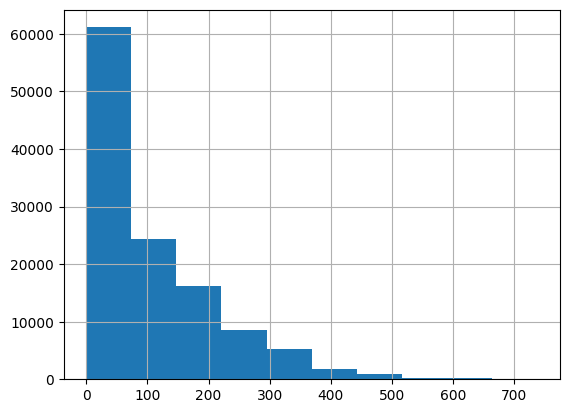

In [ ]:
df['lead_time'].hist()

<Axes: >

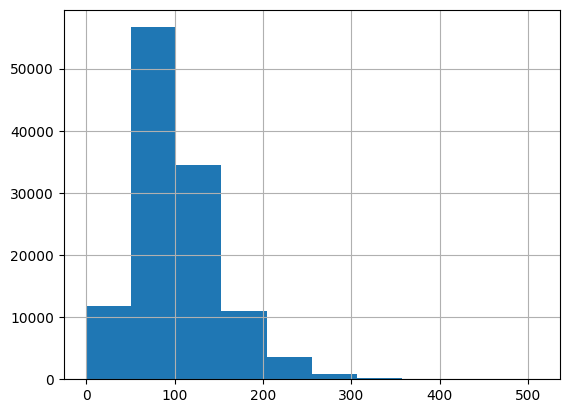

In [ ]:
df = df[df['adr'] < 5400]
df['adr'].hist()